In [253]:
# Import usual packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
from scipy import stats
from scipy.stats import poisson
from scipy.stats import uniform
from tabulate import tabulate
%matplotlib inline

# Numpy Random Seed

In [254]:
# Produce random series to use for checking this lab's results
np.random.seed(0)

# Variable of Transformation
For a random distribution of x between 0 and 1 with variable transformation $u=f(x)$, we can calculate the probability density function $g(u)$ using an analytic method. In this assignment, we will draw a random sample from the uniform distribution, apply a transformation to each data point, and check the consistency of transformed distributions with the analytic prediction.

1. Draw a 1000 events sample between $x_i, i=0,1,...,999$ using built in distributions in scipy with uniform density between 0 and 1.
2. For each value of $x_i$, calculate the transformed value $u=x^2$
3. Draw the $u_i$ distribution. Plot the analytic solution $g(u)$ in the same plot and compare the consistency. Show detils about how you derive $g(u)$ analytically.
4. Repeat step 1,2,3 with one of the transformation functions below.
        \begin{equation}
        i)\   u=1/x \\
        ii)\   u=\sqrt(x) \\
        iii)\   u=e^x \\
        iv)\   u=log(x)
        \end{equation}
        

### Derive $g(u)$ Analytically for $u=x^2$ and $u=e^x$

For a probability density $f(x)$ with transformation by the function $u(x)$, the p.d.f of $u$, $g(u)$ is, in relation: 

\begin{equation*}
g(u) = f(x)\left|\frac{dx}{du}\right|
\end{equation*}

### Solution for $u=e^x$
To find $g(u)$ using the expression above, we first find x in terms of u:

\begin{equation}
x = \ln{u}
\end{equation}

Which allows us to solve the derivative term:

\begin{equation}
\left|\frac{dx}{du}\right|=\left|\frac{d(\ln(u))}{du}\right| \\
\left|\frac{dx}{du}\right| = \left|\frac{1}{u}\right| \\
\left|\frac{dx}{du}\right| = \frac{1}{u}
\end{equation}

Solving for $g(u)$ gives:

\begin{equation}
g(u) = f(x)\left|\frac{dx}{du}\right| \\
g(u) = 1*\frac{1}{u} \\
g(u) = \frac{1}{u}
\end{equation}

### Solution for $u=x^2$

solve for x in terms of u:
\begin{equation}
x = \sqrt{u}
\end{equation}

Referring to the first equation for $g(u)$, solve for the derivative term:
\begin{equation}
\left|\frac{dx}{du}\right|=\left|\frac{d(u^{1/2})}{du}\right| \\
\left|\frac{dx}{du}\right| = \left|\frac{u^{-1/2}}{2}\right| \\
\left|\frac{dx}{du}\right| = \frac{u^{-1/2}}{2}
\end{equation}

Solving for $g(u)$ gives:

\begin{equation}
g(u) = f(x)\left|\frac{dx}{du}\right| \\
g(u) = 1*\frac{u^{-1/2}}{2} \\
g(u) = \frac{u^{-1/2}}{2} \\
g(u) = \frac{1}{2\sqrt{x}}
\end{equation}

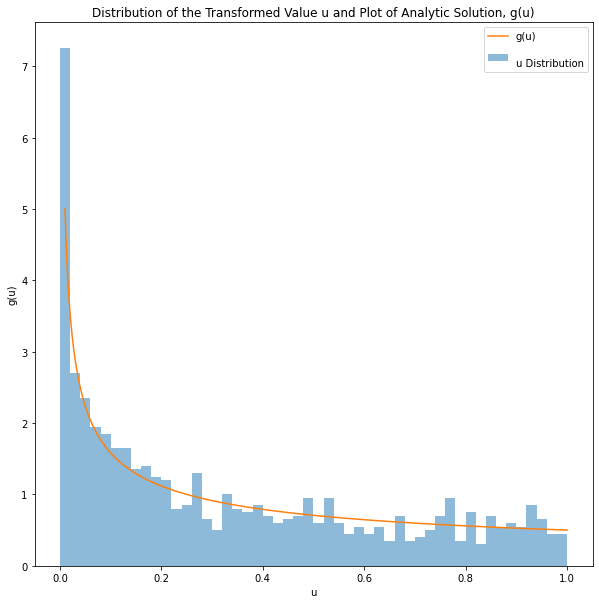

In [255]:
# Draw 1000 events sample between x_1-x_999 with uniform density between 0 and 1
x = uniform.rvs(size=1000)

# define u from calculations above 
u = x ** 2

# define g for analytic solutions g(u) (analytic sollutions done in markdown above)
uu = np.linspace(0.01, 1, 1000) # To plot on same fig define values of u to plug into g
g = 1 / (2 * (uu ** 0.5))

# Plot the distribution of the transformed variable u (histogram) with a plot of the analytic solution g(u) 
fig, ax = plt.subplots(1, 1, figsize=(10,10))

ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(uu, g)

plt.title("Distribution of the Transformed Value u and Plot of Analytic Solution, g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.legend(["g(u)", "\nu Distribution"])

### $u=e^x$

4. Repeat step 1,2,3 with one of the transformation functions below.
        \begin{equation}
        i)\   u=1/x \\
        ii)\   u=\sqrt(x) \\
        iii)\   u=e^x \\
        iv)\   u=log(x)
        \end{equation}

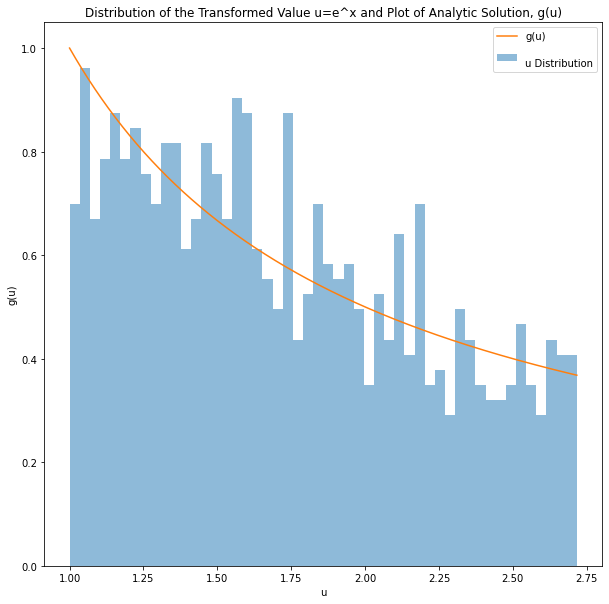

In [275]:
# For u=e^x repeat
# Draw 1000 event samples, x, from uniform function
x = uniform.rvs(size=1000)

# Define u and g(u) from analytical solutions found in markdown above
u = np.exp(x)

# Define g(u) and plot u distribution over g(u) plot
uu = np.linspace(1, np.max(u), 1000) # Make u values so that everything can be plotted on same graph
g = 1 / uu

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.hist(u, bins=50, density=True, alpha=0.5)
ax.plot(uu, g)

plt.title("Distribution of the Transformed Value u=e^x and Plot of Analytic Solution, g(u)")
plt.xlabel("u")
plt.ylabel("g(u)")

ax.legend(["g(u)", "\nu Distribution"])

# Throwing 2 Dice
We can simulate a fair dice by drawing a random uniform distribution of x between 0 and 1. There are multiple ways to do so, e.g. multiply a random nyumber x by 6, take the integer part of the number and add it by one ($[0,1]\rightarrow[0,5]\rightarrow[1,6]$), or use numpy.random.uniform(). This numbre represents the face of the dice. We cn repeat this procedure to simulate rolling the dice N times.

1. Simulate a pair of dice $N=1000$ times.
2. Calcuate the sum of each pair.
3. Draw the distribution of the sum.
4. Calculate mean and cariance of the distribution of the sum.
5. Calculate the probability of sevens (i.e. sum of two dices equals to 7) by taking the ratio of this number of sevens to 1000. Evaluate the statistical uncertainty of the probability (assuming Binomil errors).
6. Compare the probability of sevens from step 5 to the analytic calcuation based on the homework method. Discuss consistency between the simulation and analytic calculation.


In [257]:
# Function to simulate a pair of dice and calculate the sum of each pair 
def dice_throws(dice, throws):
    return np.sum(np.random.randint(1,7,(dice, throws)), axis=0)

In [258]:
# Simulate a pair for N=1000 throws 
sum_throws = dice_throws(2, 1000)


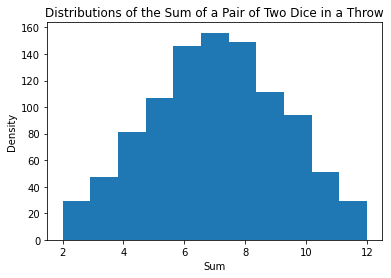

In [259]:
# Function puts out histogram of distribution of the sum (sum_throws) given bins
def dice_throws_hist(sum_throws, bins):
    plt.hist(sum_throws, bins)
    plt.xlabel("Sum")
    plt.ylabel("Density")
    plt.title("Distributions of the Sum of a Pair of Two Dice in a Throw")
    plt.show()
    
dice_throws_hist(sum_throws, 11)        


In [260]:
# Mean and Variance of the sum
variance = np.var(sum_throws, axis=None)
mean = np.mean(sum_throws, axis=None)

print("The variance of the dice throw sum distribution is:", variance)
print("The mean of the dice throw sum distribution is:", mean)

The variance of the dice throw sum distribution is: 5.755644
The mean of the dice throw sum distribution is: 7.066


In [261]:
# Probability of sevens
prob_sevens = np.count_nonzero(sum_throws == 7) / 1000
print("The probability of rolling a sum of sevens for N=1000 is", prob_sevens)

# Calculate uncertainty in the probability as the standard error of the binomial proportion
uncertainty_sevens = np.sqrt((prob_sevens * (1 - prob_sevens)) / 1000)
print("The statistical uncertainty in the probability of sevens is", uncertainty_sevens)

The probability of rolling a sum of sevens for N=1000 is 0.156
The statistical uncertainty in the probability of sevens is 0.011474493452871897


In [262]:
# Find the probability of sevens using the analytical method and compare
prob_sevens_analytical = 6 * ((1 / 6) * (1 / 6))
print("The analytical probability of rolling a sum of sevens for N=1000 is", prob_sevens_analytical)

The analytical probability of rolling a sum of sevens for N=1000 is 0.16666666666666666


The probability of rolling two dice to a sum of sevens for N=1000 rolls is 0.167 using the simulation method and 0.166 using the analytical method. Both are very close with less than 0.2% difference. The analytical solution also falls well within the range of uncertainty found for a sum of sevens using the simulation.

# Central Limit Theorem
The central limit theorem states that the distribution of the sample mean $\bar{x}$, $\bar{x}=\frac{1}{N}\sum_{i=1}^{N}x_i$ of N variables $x_i$ with finite variance $\sigma^2$ in the limit $N\to \infty$ will approach a normal distribution with variance $\sigma^2/N$ independent of the form of the distribution f(x). In this computational experiment, we will test this theorem. Generate a $M=5$ event sample using built-in Poisson distributions in scipy with $\lambda=2.0$. From these 5 events, calculate the mean $\mu_5$ and standard deviation $\sigma_5$. Repeat this process N times. For each time, you will draw different sets of $M=5$ events,and calculate independent $\mu_5$ and, $\sigma_5$ respectively.

1. Let N=10. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
2. Let N=100. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
3. Let N=1000. Plot distributions of $\mu_5$ and $\sigma_5$. For each plot, indicate the mean and variance in the legend.
4. Discuss your observation. 
        \begin{equation}
        i)\ Do\ \mu_5\ and\ \sigma_5\ approach\ normal\ distributions\ when\ N\ is\ approaching\ a\ larger\ number? \\
        ii)\ Is\ the\ variance\ of\ \mu_5\ and\ \sigma_5\ following\ some\ scaling\ rule\ as\ a\ function\ of\ N?
        \end{equation} 
5. Fix N=1000, plot distribition of $\mu_{100}$ and $\sigma_{100}$ which are mean and standard deviaation of a sample of $M=100$ events with $\lambda=2.0$. Discuss your observation.

In [263]:
# Define first function: takes in N and generates the M=5 event sample, gives the avg. and standard deviation, and repeats N times.
def Poisson(N):
    avg = np.zeros(N, dtype=object) # create empty arrays to fill with averages and standard deviations for N runs
    sd = np.zeros(N, dtype=object)
    for k in range(N): # loop to fill arrays 
        sample = poisson.rvs(2, size=5) # generate M=5 event sample with lambda=2
        avg[k] = np.mean(sample)
        sd[k] = np.std(sample) 
    return (avg, sd)

# Define second function: takes in the arrays of mean and standard deviation. Plots and returns each distribution's avg and var
def Poisson_plot(avg, sd, bins, N):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(avg, bins=bins, alpha=0.5) # Distribution of averages
    ax[1].hist(sd, bins=bins, alpha=0.5) # Distribution of standard deviations
    ax[0].set_title("Distribution of Means \nof N 5 Event Samples")
    ax[1].set_title("Distribution of Standard Deviations \nof N 5 Event Samples")
    ax[0].set_xlabel("Mean")
    ax[1].set_xlabel("Standard Deviation")
    ax[0].set_ylabel("Density")
    ax[1].set_ylabel("Density")
    # A, S = Poisson(N) # call first function to  distribution and give its mean and var
    distr0_mean = np.mean(avg) # Find mean and var for distribution of means (avg array)
    distr0_var = np.var(avg)
    distr1_mean = np.mean(sd) # Find mean and var for distribution of standard deviations
    distr1_var = np.var(sd)
    ax[0].legend(['mean=' + str(round(distr0_mean, 3)) + '\nvariance=' + str(round(distr0_var, 3))])
    ax[1].legend(['mean=' + str(round(distr1_mean, 3)) + '\nvariance=' + str(round(distr1_var, 3))])
    return   

### $N=10$

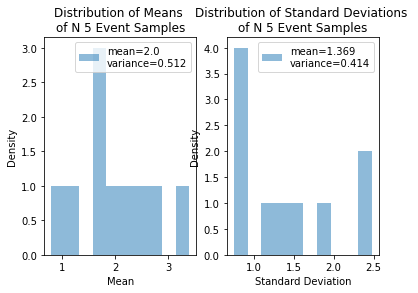

In [264]:
# Utilize functions to plot mean and variance for N=10
A10, S10 = Poisson(10) # call first function to generate N=10 M=5 event samples and find avg and std
plt.show(Poisson_plot(A10, S10, 10, 10)) # call second function to plot avg and std distributions and find their avg and variance

### $N=100$

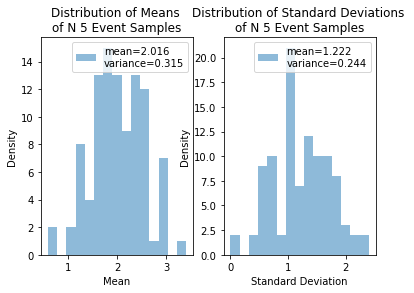

In [265]:
# Utilize functions to plot mean and variance for N=100
A100, S100 = Poisson(100) # call first function to generate N=10 M=5 event samples and find avg and std
plt.show(Poisson_plot(A100, S100, 15, 100)) # call second function to plot avg and std distributions and find their avg and variance

### $N=1000$

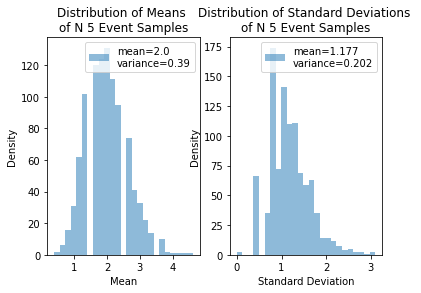

In [266]:
# Utilize functions to plot mean and variance for N=1000
A1000, S1000 = Poisson(1000) # call first function to generate N=10 M=5 event samples and find avg and std
plt.show(Poisson_plot(A1000, S1000, 25, 1000)) # call second function to plot avg and std distributions and find their avg and variance

## Discussion

From the three pairs of mean and standard deviation distributions for N=10, 100 and 1000 of m=5 sample events, we see that both distributions resemble a normal distribution more as N increases. In general, the variance for each mean and standrd deviation distribution seems to increase with larger N. 

### $N=1000$, $M=100$, $\lambda=2.0$

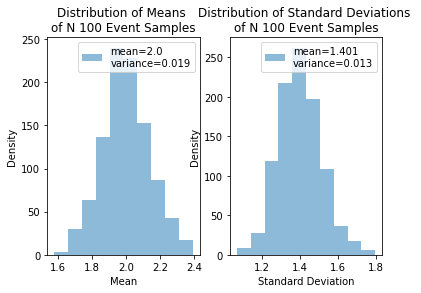

In [267]:
# Redefine two functions poisson and poisson_plot for M=100
def Poisson_M100(N):
    avg = np.zeros(N, dtype=object) # create empty arrays to fill with averages and standard deviations for N runs
    sd = np.zeros(N, dtype=object)
    for k in range(N): # loop to fill arrays 
        sample = poisson.rvs(2, size=100) # generate M=100 event sample with lambda=2
        avg[k] = np.mean(sample)
        sd[k] = np.std(sample) 
    return (avg, sd)

def Poisson_plot_M100(avg, sd, bins, N):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(avg, bins=bins, alpha=0.5)
    ax[1].hist(sd, bins=bins, alpha=0.5)
    ax[0].set_title("Distribution of Means \nof N 100 Event Samples")
    ax[1].set_title("Distribution of Standard Deviations \nof N 100 Event Samples")
    ax[0].set_xlabel("Mean")
    ax[1].set_xlabel("Standard Deviation")
    ax[0].set_ylabel("Density")
    ax[1].set_ylabel("Density")
    distr0_mean = np.mean(avg) # Find mean and var for distribition of means
    distr0_var = np.var(avg)
    distr1_mean = np.mean(sd) # Find mean and var for distribution of 
    distr1_var = np.var(sd)
    ax[0].legend(['mean=' + str(round(distr0_mean, 3)) + '\nvariance=' + str(round(distr0_var, 3))])
    ax[1].legend(['mean=' + str(round(distr1_mean, 3)) + '\nvariance=' + str(round(distr1_var, 3))])
    return   

# Generate events sample and avg. and std
AM100, SM100 = Poisson_M100(1000)

# Call plotting function
plt.show(Poisson_plot_M100(AM100, SM100, 10, 1000))

## Discussion
For fixed N=100 and M=100 event sample, the variances of mean and standard deviation are much smaller than all previous distributions for M=5 and and N=10,100,1000. 

# Bonus
Generate 1000 samples. Each sample is a 100 event dataset using one built-in distribution in scipy but not Binomial, Normal, nor Poisson. Show that the mean and variance of these 1000 samples also behave like a normal distribution. 

In [268]:
# Import bernoulli and generate N=1000 M=100 event samples similarly to problem 3 but with new distribution
from scipy.stats import bernoulli
from scipy.stats import norm


In [269]:
# New functions similar to those for the poisson dist. samples, but now sampling, calculations, and plots for bernoulli
def Bernoulli(N, M):
    b_avg = np.zeros(N, dtype=object)
    b_var = np.zeros(N, dtype=object)
    for i in range(N):
        b_sample = bernoulli.rvs(0.2, size=M)
        b_avg[i] = np.mean(b_sample)
        b_var[i] = np.var(b_sample)
    return(b_avg, b_var)

def Bernoulli_plot(avg, var, bins, N, M):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(avg, bins=bins, alpha=0.5)
    ax[1].hist(var, bins=bins, alpha=0.5)
    ax[0].set_title("Distribution of Means \nof N 100 Event Samples")
    ax[1].set_title("Distribution of Variances \nof N 100 Event Samples")
    ax[0].set_xlabel("Mean")
    ax[1].set_xlabel("Variance")
    ax[0].set_ylabel("Density")
    ax[1].set_ylabel("Density")
    A, S = Bernoulli(N, M=100) # call first function to  distribution and give its mean and var
    distr0_mean = np.mean(A) # Find mean and var for distribition of means
    distr0_var = np.var(A)
    distr1_mean = np.mean(S) # Find mean and var for distribution of 
    distr1_var = np.var(S)
    ax[0].legend(['mean=' + str(round(distr0_mean, 3)) + '\nvariance=' + str(round(distr0_var, 3))])
    ax[1].legend(['mean=' + str(round(distr1_mean, 3)) + '\nvariance=' + str(round(distr1_var, 3))])
    return fig, distr0_mean, distr0_var, distr1_mean, distr1_var 


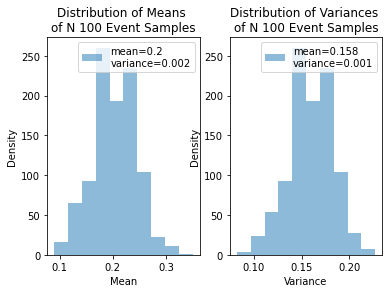

In [270]:
# Generate standard deviation and mean arrays for the 1000 100 event samples and their histograms
B_avgs, B_vars = Bernoulli(1000, 100)

plt.show(Bernoulli_plot(B_avgs, B_vars, 10, 1000, 100))
                        

Text(0, 0.5, 'Density')

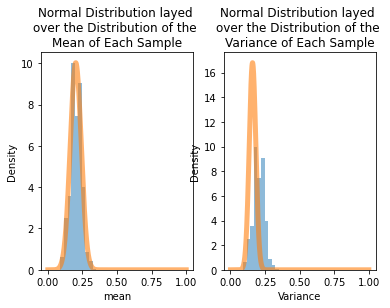

In [271]:
# Compare the distributions for mean and variance to the normal distribution by laying a plot over
x = np.linspace(0,1,1000) # Random array of x values to feed into norm function

fig, ax = plt.subplots(1, 2)
plt.xlim = (-1, 1)

ax[0].hist(B_avgs, bins=10, density=True, alpha=0.5)
ax[0].plot(x, norm.pdf(x, loc=np.mean(B_avgs), scale=np.std(B_avgs)), linewidth=5, alpha=0.6) 
ax[0].set_title('Normal Distribution layed \nover the Distribution of the \nMean of Each Sample')
ax[0].set_xlabel("mean")
ax[0].set_ylabel("Density")

ax[1].hist(B_avgs, bins=10, density=True, alpha=0.5)
ax[1].plot(x, norm.pdf(x, loc=np.mean(B_vars), scale=np.std(B_vars)), linewidth=5, alpha=0.6) 
ax[1].set_title('Normal Distribution layed \nover the Distribution of the \nVariance of Each Sample')
ax[1].set_xlabel("Variance")
ax[1].set_ylabel("Density")


